## Observations and Insights 

In [1]:
#************************Comments on Checkpoint #13***********************
# Done

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress



# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# # Combine the data into a single dataset
mouse_df = pd.read_csv(mouse_metadata_path)
study_df = pd.read_csv(study_results_path)

merge_df= pd.merge(mouse_df, study_df, on="Mouse ID", how="outer")

# Display the data table for preview
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
merge_df['Mouse ID'].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

merge_df[merge_df.duplicated(keep=False)]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.0,0
909,g989,Propriva,Female,21,26,0,45.0,0


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

merge_g989_df= merge_df[merge_df['Mouse ID'].str.contains("g989")]
merge_g989_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_merge_df = merge_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])

clean_merge_df

#** Note went from 1893 to 1888 rows below

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
#Check mouse that had duplicates before to ensure they are not in the clean merge

merge_g989_2_df= clean_merge_df[clean_merge_df['Mouse ID'].str.contains("g989")]
merge_g989_2_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
912,g989,Propriva,Female,21,26,10,51.745156,0
914,g989,Propriva,Female,21,26,15,51.325852,1
916,g989,Propriva,Female,21,26,20,55.326122,1
918,g989,Propriva,Female,21,26,25,56.045564,1
919,g989,Propriva,Female,21,26,30,59.082294,1
920,g989,Propriva,Female,21,26,35,62.570880,2


In [7]:
#****** Search for duplicates, return = 0

clean_merge_df[clean_merge_df.duplicated(keep=False)]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [8]:
# Checking the number of mice in the clean DataFrame.
clean_merge_df['Mouse ID'].nunique()

249

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

summary_clean_merge_df = clean_merge_df.groupby(['Drug Regimen'])
abbrev_summary_clean_merge_df = summary_clean_merge_df[['Tumor Volume (mm3)']]

abbrev_summary_clean_merge_df.count()


,Tumor Volume (mm3)
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,156
Ramicane,228
Stelasyn,181


In [10]:
mean_tumor = abbrev_summary_clean_merge_df.mean()
mean_tumor = mean_tumor.rename(columns={'Tumor Volume (mm3)': 'Tumor Mean'})

median_tumor = abbrev_summary_clean_merge_df.median()
median_tumor = median_tumor.rename(columns={'Tumor Volume (mm3)': 'Tumor Median'})

count_tumor = abbrev_summary_clean_merge_df.count()
count_tumor = count_tumor.rename(columns={'Tumor Volume (mm3)': 'Tumor Count'})

variance_tumor = abbrev_summary_clean_merge_df.var()
variance_tumor = variance_tumor.rename(columns={'Tumor Volume (mm3)': 'Tumor Variance'})

standarddeviation_tumor = abbrev_summary_clean_merge_df.std()
standarddeviation_tumor = standarddeviation_tumor.rename(columns={'Tumor Volume (mm3)': 'Tumor Standard Deviation'})

sem_tumor = abbrev_summary_clean_merge_df.sem()
sem_tumor = sem_tumor.rename(columns={'Tumor Volume (mm3)': 'Tumor SEM'})


In [11]:
result = pd.concat([mean_tumor, median_tumor, variance_tumor, standarddeviation_tumor, sem_tumor ], axis=1, sort=False)

result

,Tumor Mean,Tumor Median,Tumor Variance,Tumor Standard Deviation,Tumor SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

abbrev_summary_clean_merge_df.agg(['mean', 'median', 'var', 'std', 'sem'])

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Number of Unique Mice')

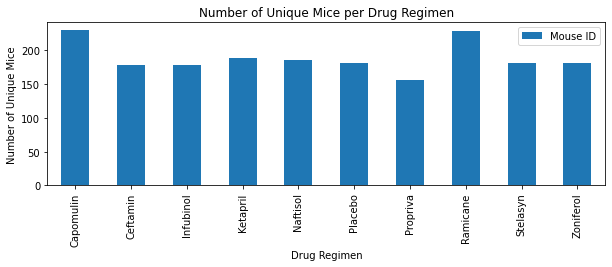

In [13]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
#* Generate a bar plot using both Pandas's `DataFrame.plot()` and Matplotlib's `pyplot` that shows  the number of total mice 
#for each treatment regimen throughout the course of the study.

#  * **NOTE:** These plots should look identical.

abbrev_bar_clean_merge_df = summary_clean_merge_df[['Mouse ID']]

abbrev_bar_clean_merge_df.count()

abbrev_bar_clean_merge_df.count().plot(kind="bar", figsize=(10,3))

plt.title("Number of Unique Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Mice")

Text(0, 0.5, 'Number of Unique Mice')

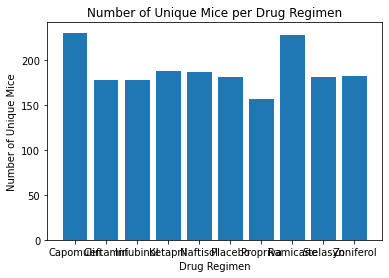

In [14]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
unique_mouses = [230,178,178,188,186,181,156,228,181,182]
Drug_Bar = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]

plt.bar(Drug_Bar, unique_mouses, width=.8, align="center")

plt.rcParams['figure.figsize'] = (8,3)


plt.title("Number of Unique Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Mice")

Text(0, 0.5, 'Number of Unique Mice')

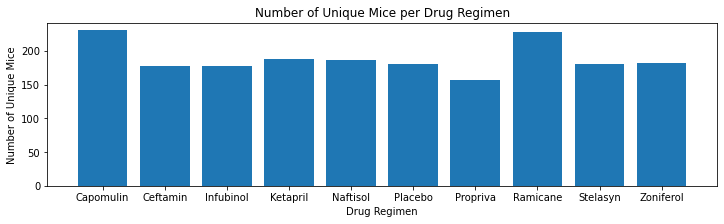

In [33]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

#** Note, when I run this a 2nd time, the rcParams function adjusts the figure width.**


unique_mouses = [230,178,178,188,186,181,156,228,181,182]
Drug_Bar = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]

plt.bar(Drug_Bar, unique_mouses, width=.8, align="center")

plt.rcParams['figure.figsize'] = (12,3)


plt.title("Number of Unique Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Mice")

<ipython-input-20-3882446c52c2>:16: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(abbrev_bar_clean_merge_df.nunique(), labels=pies, explode=explode, colors=colors,


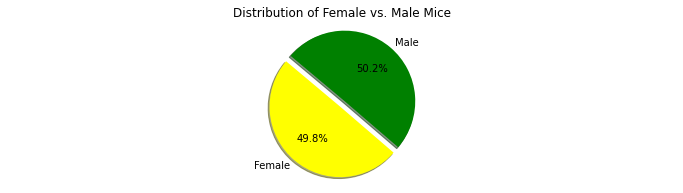

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

pie_clean_merge_df = clean_merge_df.groupby(['Sex'])

abbrev_bar_clean_merge_df = pie_clean_merge_df[['Mouse ID']]

# pie_clean_merge_df.nunique()

abbrev_bar_clean_merge_df.nunique()

colors = ["yellow","green"]
explode = (0.1,0)
pies = ["Female", "Male"]
plt.title("Distribution of Female vs. Male Mice")

plt.pie(abbrev_bar_clean_merge_df.nunique(), labels=pies, explode=explode, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")


plt.show()

Text(0.5, 1.0, 'Distribution of Female vs. Male Mice')

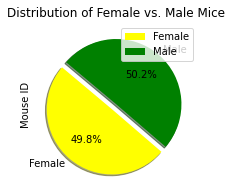

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

abbrev_bar_clean_merge_df.nunique().plot(kind="pie", subplots=True, explode=explode, 
                                         colors=colors, autopct="%1.1f%%", shadow=True, startangle=140 )
colors = ["yellow","green"]
explode = (0.1,0)
pies = ["Female", "Male"]
plt.title("Distribution of Female vs. Male Mice")

## Quartiles, Outliers and Boxplots

In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [23]:
filter_list2 =  ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filter_list2



['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

In [24]:
max_tumor = clean_merge_df.groupby(["Mouse ID"])['Timepoint'].max()
max_tumor_df = max_tumor.reset_index()

merged_data = max_tumor_df.merge(clean_merge_df, on=['Mouse ID', 'Timepoint'], how="left")
merged_data

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [25]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []
for drug in filter_list2:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_data.loc[merged_data["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    # add subset 
    tumor_vol_list.append(final_tumor_vol)
    # Calculate the IQR and quantitatively determine if there are any potential outliers.
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug} potential outliers: {outliers}")
       

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


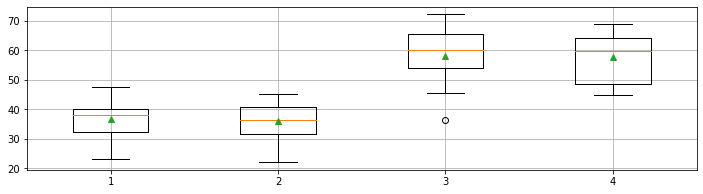

1= Capomulin 2=Ramicane 3=Infubinol 4=Ceftamin


In [38]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vol_list, showmeans=True)
plt.grid()
plt.show()
print(f"1= Capomulin", "2=Ramicane","3=Infubinol", "4=Ceftamin")


## Line and Scatter Plots

In [27]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

remove_list = ['Sex', 'Weight (g)', 'Age_months', 'Metastatic Sites', 'Mouse ID', 'Drug Regimen']

merge_f966_df= clean_merge_df[clean_merge_df['Mouse ID'].str.contains("f966")]
merge_f966_df.drop(columns=(remove_list))

,Timepoint,Tumor Volume (mm3)
60,0,45.000000
61,5,38.796474
62,10,35.624403
63,15,32.623003
64,20,30.485985


Text(0, 0.5, 'Tumor Volume')

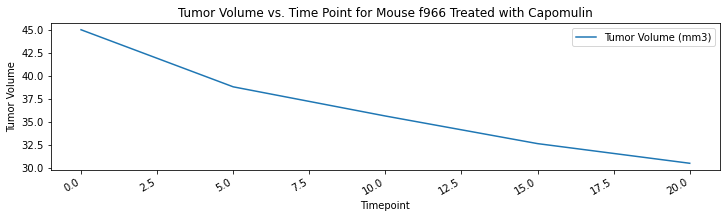

In [39]:
lines = merge_f966_df.plot(subplots=True,kind="line", x='Timepoint', y='Tumor Volume (mm3)')

plt.title("Tumor Volume vs. Time Point for Mouse f966 Treated with Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")

In [29]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_table = clean_merge_df.loc[clean_merge_df['Drug Regimen'] == "Capomulin"]
cap_avg_table = cap_table.groupby(["Mouse ID"]).mean()[['Weight (g)', 'Tumor Volume (mm3)']]
x = cap_avg_table["Weight (g)"]
y = cap_avg_table["Tumor Volume (mm3)"]

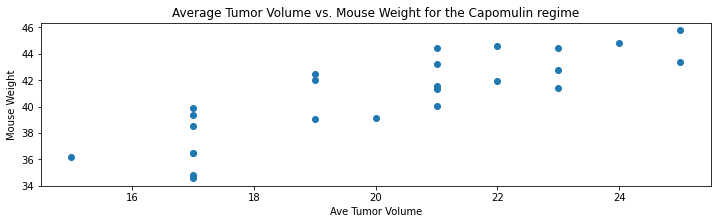

In [30]:

plt.title("Average Tumor Volume vs. Mouse Weight for the Capomulin regime")
plt.xlabel("Ave Tumor Volume")
plt.ylabel("Mouse Weight")

plt.scatter(x,y)
plt.show()

## Correlation and Regression

In [31]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# Add the linear regression equation and line to plot


The correlation between both factors is 0.84
The r-squared is: 0.7088568047708717
The regression equation is: y = 0.95x + 21.55


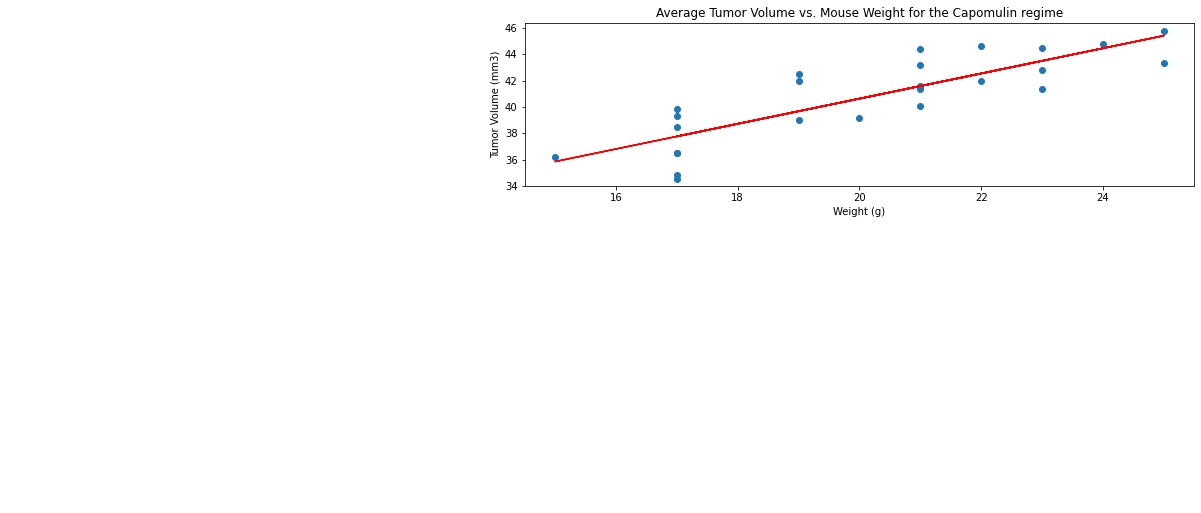

In [32]:


plt.title("Average Tumor Volume vs. Mouse Weight for the Capomulin regime")
plt.xlabel("Ave Tumor Volume")
plt.ylabel("Mouse Weight")

correlation = st.pearsonr(x,y)
print(f"The correlation between both factors is {round(correlation[0],2)}")

x = cap_avg_table["Weight (g)"]
y = cap_avg_table["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
print(f"The r-squared is: {rvalue**2}")
print(f"The regression equation is: {line_eq}")
plt.show()